## Import libs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_LAB_PID
from package_DBR import *

## Set parameters for SOPDT model

In [2]:
Ts = 1.0

Ksopdt = 0.568729702885908
T1sopdt = 172.40926097266686
T2sopdt = 2.8511434253226774*(10**-5)
THETAsopdt = 1.9999999968968731

setPoint = 30

setPoints = [0, 0, 0, setPoint]

## Set parameters for PID

In [3]:
Kc = 1.1
Ti = 10
Td = 5

alpha = 0.5

Ts = 0.1
TSim = 50

N = int(TSim/Ts)+1

t = []
SP = []
SPPath = {0: 0, 5: 20}

for i in range(0,N):
  t.append(i*Ts)
  SelectPath_RT(SPPath,t,SP)

previous = {"MVi": 0, "MVd": 0, "E": 0}

## Simulate step response

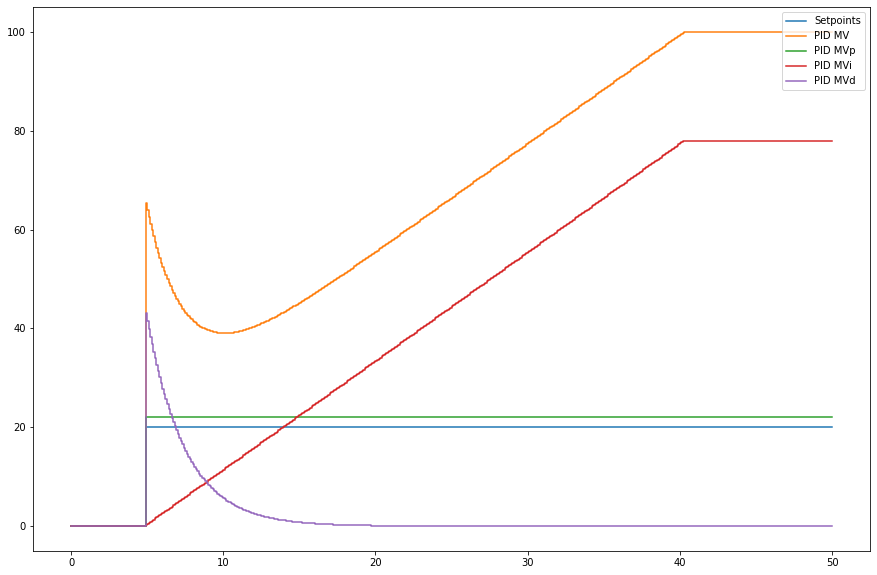

In [4]:
plotMV = []
plotMVp = []
plotMVi = []
plotMVd = []

for i in range(0, N):
  PID_OUT = package_LAB_PID.PID(Ts, previous, SP[i], Kc, Ti, Td, alpha, ["EBD", "TRAP"])
  previous = {"MVi": PID_OUT["MVi"], "MVd": PID_OUT["MVd"], "E": PID_OUT["E"]}
  plotMV.append(PID_OUT["MV"])
  plotMVp.append(PID_OUT["MVp"])
  plotMVi.append(PID_OUT["MVi"])
  plotMVd.append(PID_OUT["MVd"])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.step(t, np.array(SP), label='Setpoints')
plt.step(t, np.array(plotMV), label='PID MV')
plt.step(t, np.array(plotMVp), label='PID MVp')
plt.step(t, np.array(plotMVi), label='PID MVi')
plt.step(t, np.array(plotMVd), label='PID MVd')

plt.legend(loc='upper right')



plt.show()